In [64]:
import paddle
import torch
import numpy as np
import random

import matplotlib.pyplot as plt

In [2]:
print(paddle.__version__)
print(torch.__version__)

2.0.0-rc1
1.7.0+cu101


# Tensor

In [3]:
print(paddle.tensor)
print()
print(dir(paddle.tensor))

<module 'paddle.tensor' from 'C:\\Users\\wenylv\\Miniconda3\\lib\\site-packages\\paddle\\tensor\\__init__.py'>

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'abs', 'acos', 'add', 'add_n', 'addmm', 'all', 'allclose', 'any', 'arange', 'argmax', 'argmin', 'argsort', 'asin', 'atan', 'attribute', 'bmm', 'broadcast_shape', 'broadcast_to', 'cast', 'ceil', 'cholesky', 'chunk', 'clip', 'concat', 'cos', 'cosh', 'creation', 'cross', 'cumsum', 'diag', 'dist', 'divide', 'dot', 'empty', 'empty_like', 'equal', 'equal_all', 'erf', 'exp', 'expand', 'expand_as', 'eye', 'flatten', 'flip', 'floor', 'floor_divide', 'floor_mod', 'full', 'full_like', 'gather', 'gather_nd', 'greater_equal', 'greater_than', 'histogram', 'increment', 'index_sample', 'index_select', 'inverse', 'is_empty', 'is_tensor', 'isfinite', 'isinf', 'isnan', 'kron', 'less_equal', 'less_than', 'linalg', 'linspace', 'log', 'log10', 'log1p', 'log2', 'logic', 'logical_an

In [4]:
## Creation

In [5]:
data = paddle.to_tensor(np.ones(shape=(2, 3)), place=paddle.CPUPlace(), stop_gradient=False)
print(data)

Tensor(shape=[2, 3], dtype=float64, place=CPUPlace, stop_gradient=False,
       [[1., 1., 1.],
        [1., 1., 1.]])


In [6]:
data = paddle.ones(shape=(2, 3), dtype='float32')
print(data)

Tensor(shape=[2, 3], dtype=float32, place=CUDAPlace(0), stop_gradient=True,
       [[1., 1., 1.],
        [1., 1., 1.]])


In [7]:
# CPUPlace(). CUDAPlace(0), CUDAPinnedPlace()

print(data.place)
_data = data.pin_memory()
print(_data.place)

CUDAPlace(0)
CUDAPinnedPlace


In [8]:
# 'bool'，'float16'，'float32'，'float64'，'int8'，'int16'， 'int32'，'int64'，'uint8'

print(data.dtype)
print(data.astype('float64').dtype)

VarType.FP32
VarType.FP64


In [9]:
data.set_value(np.random.randn(*data.shape).astype(np.float32))
print(data)

Tensor(shape=[2, 3], dtype=float32, place=CUDAPlace(0), stop_gradient=True,
       [[ 2.13427687, -0.34139201,  0.20879221],
        [ 0.25285751,  0.43862194,  0.22897470]])


In [10]:
print(type(data.numpy()))

<class 'numpy.ndarray'>


In [11]:
## Operator

In [12]:
a = paddle.rand(shape=(2, 2, 1))
b = paddle.rand(shape=(1, 3))
print((a + b).sum())
print((a - b).sum())
print((a * b).shape)

print(b.broadcast_to([1,2,3]))

Tensor(shape=[1], dtype=float32, place=CUDAPlace(0), stop_gradient=True,
       [10.60790634])
Tensor(shape=[1], dtype=float32, place=CUDAPlace(0), stop_gradient=True,
       [4.12373304])
[2, 2, 3]
Tensor(shape=[1, 2, 3], dtype=float32, place=CUDAPlace(0), stop_gradient=True,
       [[[0.12459087, 0.12557355, 0.56035727],
         [0.12459087, 0.12557355, 0.56035727]]])


In [13]:
## Structure

In [14]:
print(data.shape)
print(data.grad)

[2, 3]
None


In [15]:
## Gradient

In [16]:
print(data.grad)
print(data.gradient())
print(data.persistable)
print(data.stop_gradient)
print(data.clear_gradient())

None
None
False
True
None


In [17]:
# paddle.disable_static()

x = paddle.rand(shape=(3, 2))
# p = paddle.framework.create_parameter(shape=(2, 2), dtype='float32')
p = paddle.rand(shape=(2, 2))
# p.persistable = True
p.stop_gradient = False

for i in range(2):
    
    y = paddle.matmul(x, p)
    
    # y.stop_gradient = True
    # y = y.detach()
    
    loss = y.sum()
    loss.backward()

    print('{}\n{}\n{}\n'.format(i, y.grad, p.grad))
    
    # p.clear_grad()

print(type(p), type(x), type(y))

0
[[1. 1.]
 [1. 1.]
 [1. 1.]]
[[1.3556948 1.3556948]
 [0.7386035 0.7386035]]

1
[[1. 1.]
 [1. 1.]
 [1. 1.]]
[[2.7113895 2.7113895]
 [1.477207  1.477207 ]]

<class 'paddle.VarBase'> <class 'paddle.VarBase'> <class 'paddle.VarBase'>


In [ ]:
"""
---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
<ipython-input-163-a00ae3b23c8f> in <module>
     12 
     13     loss = y.sum()
---> 14     loss.backward()
     15 
     16     print('{}\n{}\n{}\n'.format(i, p.grad, y.grad))

<decorator-gen-239> in backward(self, retain_graph)

~\Miniconda3\lib\site-packages\paddle\fluid\wrapped_decorator.py in __impl__(func, *args, **kwargs)
     23     def __impl__(func, *args, **kwargs):
     24         wrapped_func = decorator_func(func)
---> 25         return wrapped_func(*args, **kwargs)
     26 
     27     return __impl__

~\Miniconda3\lib\site-packages\paddle\fluid\framework.py in __impl__(*args, **kwargs)
    221         assert in_dygraph_mode(
    222         ), "We only support '%s()' in dynamic graph mode, please call 'paddle.disable_static()' to enter dynamic graph mode." % func.__name__
--> 223         return func(*args, **kwargs)
    224 
    225     return __impl__

~\Miniconda3\lib\site-packages\paddle\fluid\dygraph\varbase_patch_methods.py in backward(self, retain_graph)
    174                                           retain_graph)
    175             else:
--> 176                 self._run_backward(framework._dygraph_tracer(), retain_graph)
    177         else:
    178             raise ValueError(

RuntimeError: (AlreadyExists) Op deps must be initialized here
  [Hint: Expected node_deps_.empty() == true, but received node_deps_.empty():0 != true:1.] (at D:\v2.0.0rc1\paddle\paddle\fluid\imperative\basic_engine.cc:150)
  [Hint: If you need C++ stacktraces for debugging, please set `FLAGS_call_stack_level=2`.]
"""

In [18]:
# torch version

p = torch.rand(2, 3, requires_grad=True)
x = torch.rand(2, 2)

for i in range(2):
    y = torch.matmul(x, p); y.retain_grad()
    loss = y.sum()
    loss.backward()

    print(i)
    print(y.grad)
    print(p.grad)

0
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1.4459, 1.4459, 1.4459],
        [1.2582, 1.2582, 1.2582]])
1
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2.8917, 2.8917, 2.8917],
        [2.5164, 2.5164, 2.5164]])


# Framework

In [18]:
import paddle.framework as framework

In [19]:
print(dir(framework))

['CPUPlace', 'CUDAPinnedPlace', 'CUDAPlace', 'DataParallel', 'ParamAttr', 'VarBase', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'core', 'create_parameter', 'framework', 'get_default_dtype', 'grad', 'io', 'load', 'no_grad', 'random', 'save', 'seed', 'set_default_dtype']


In [ ]:
## Attr

In [21]:
test_attr = framework.ParamAttr(name='test2', initializer=paddle.nn.initializer.Normal(mean=0, std=1.), )
print(test_attr)

In [23]:
# parameter name [test] have be been used. 
# In dygraph mode, the name of parameter can't be same.
# Please check the parameter attr value passed to self.create_parameter or constructor of dygraph Layers

mm = paddle.nn.Linear(10, 10, weight_attr=test_attr)

In [ ]:
## Parameter

In [229]:
x = paddle.rand(shape=(3, 2))
p = paddle.framework.create_parameter(shape=(2, 2), dtype='float32')
print(type(p))

issubclass(type(p), paddle.Tensor)

<class 'paddle.fluid.framework.ParamBase'>


True

# NN

In [24]:
import paddle.nn as nn
import paddle.nn.functional as functional

In [25]:
print(dir(nn))

['AdaptiveAvgPool1D', 'AdaptiveAvgPool2D', 'AdaptiveAvgPool3D', 'AdaptiveMaxPool1D', 'AdaptiveMaxPool2D', 'AdaptiveMaxPool3D', 'AlphaDropout', 'AvgPool1D', 'AvgPool2D', 'AvgPool3D', 'BCELoss', 'BCEWithLogitsLoss', 'BatchNorm', 'BatchNorm1D', 'BatchNorm2D', 'BatchNorm3D', 'BeamSearchDecoder', 'BiRNN', 'Bilinear', 'BilinearTensorProduct', 'CTCLoss', 'ClipGradByGlobalNorm', 'ClipGradByNorm', 'ClipGradByValue', 'Conv1D', 'Conv1DTranspose', 'Conv2D', 'Conv2DTranspose', 'Conv3D', 'Conv3DTranspose', 'CosineSimilarity', 'CrossEntropyLoss', 'Dropout', 'Dropout2D', 'Dropout3D', 'ELU', 'Embedding', 'Flatten', 'GELU', 'GRU', 'GRUCell', 'GroupNorm', 'HSigmoidLoss', 'Hardshrink', 'Hardsigmoid', 'Hardswish', 'Hardtanh', 'InstanceNorm1D', 'InstanceNorm2D', 'InstanceNorm3D', 'KLDivLoss', 'L1Loss', 'LSTM', 'LSTMCell', 'Layer', 'LayerList', 'LayerNorm', 'LeakyReLU', 'Linear', 'LocalResponseNorm', 'LogSigmoid', 'LogSoftmax', 'MSELoss', 'MarginRankingLoss', 'MaxPool1D', 'MaxPool2D', 'MaxPool3D', 'Maxout', 

In [26]:
## nn.functional

In [27]:
nn.functional.conv2d

<function paddle.nn.functional.conv.conv2d(x, weight, bias=None, stride=1, padding=0, dilation=1, groups=1, data_format='NCHW', name=None)>

In [28]:
## nn.layer

In [29]:
# https://github.com/PaddlePaddle/Paddle/blob/develop/python/paddle/fluid/dygraph/layers.py

class MLayer(nn.Layer):
    '''
    '''
    def __init__(self, ):
        super(MLayer, self).__init__()
        
        self.l1 = nn.Linear(10, 10, weight_attr=nn.initializer.XavierNormal())
        self.l2 = nn.Linear(10, 3)
        self.bn = nn.BatchNorm1D(10)
        self.dropout = nn.Dropout(p=0.6)
        
    def forward(self, x):
        '''
        '''
        x = self.l1(x)
        x = self.bn(nn.functional.relu(x))
        x = self.dropout(self.l2(x))
        
        return x

    def weight_init(self, ):
        '''
        '''
        pass
    
    
mlayer = MLayer()
mlayer.train() # When training, we now always track global mean and variance.

data = paddle.rand(shape=(32, 10), dtype='float32')
out = mlayer(data)

print(out.sum())

Tensor(shape=[1], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [-5.75549889])


C:\Users\wenylv\Miniconda3\lib\site-packages\paddle\nn\layer\norm.py:634: UserWarning: When training, we now always track global mean and variance.
  "When training, we now always track global mean and variance.")


In [121]:
# same as torch.nn.Module
torch.nn.Module

torch.nn.modules.module.Module

In [ ]:
## Parameter

In [22]:
class MLayer(paddle.nn.Layer):
    '''
    '''
    def __init__(self, ):
        super(MLayer, self).__init__()
        
        p1 = self.create_parameter(shape=(2, 3))
        self.add_parameter('p1', p1)

        # OR 
        # setattr
        self.p2 = self.create_parameter(shape=(2, 3))
        
        # p3 = paddle.rand(shape=(2, 3))
        # p3.stop_gradient = False
        # self.add_parameter('p3', p3)
        
    def forward():
        '''
        '''
        pass

    
for n, p in MLayer().named_parameters():
    print(n, p.shape, p, p.grad, p.persistable)

p1 [2, 3] Parameter containing:
Tensor(shape=[2, 3], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [[-0.82815331, -0.80408567, -0.20575410],
        [-0.65021932, -0.04105872,  0.81061167]]) None True
p2 [2, 3] Parameter containing:
Tensor(shape=[2, 3], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [[ 0.49414185,  0.49970096, -0.64068806],
        [-0.04616990, -0.53112006,  0.10201436]]) None True


In [44]:
p = paddle.nn.Layer().create_parameter(shape=[2, 3])
p.persistable = False
p.stop_gradient = True

print(type(p), p.shape, p.grad, p.persistable)

<class 'paddle.fluid.framework.ParamBase'> [2, 3] None False


In [48]:
p = framework.create_parameter(shape=[2, 3], dtype='float32')

print(type(p), p.shape, p.grad, p.persistable)
print(p)

<class 'paddle.fluid.framework.ParamBase'> [2, 3] None True
Parameter containing:
Tensor(shape=[2, 3], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [[-0.04849135, -0.85498643,  0.94115239],
        [ 0.06566436, -0.53498608, -0.28728154]])


In [54]:
x = paddle.rand(shape=(2, 3))
print(x)

y = p + x
print(y)
print(y.persistable)

Tensor(shape=[2, 3], dtype=float32, place=CUDAPlace(0), stop_gradient=True,
       [[0.24190661, 0.07387968, 0.24628851],
        [0.59235895, 0.75931871, 0.07467352]])
Tensor(shape=[2, 3], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [[ 0.19341525, -0.78110677,  1.18744087],
        [ 0.65802330,  0.22433263, -0.21260802]])
False


In [233]:
x = paddle.rand(shape=(3, 2))
p = paddle.framework.create_parameter(shape=(2, 2), dtype='float32')
# p = paddle.rand(shape=(2, 2))
# p.stop_gradient = False

for i in range(2):
    y = paddle.matmul(x, p)
    
    # y.stop_gradient = True
    # y = y.detach()
    
    loss = y.sum()
    loss.backward()
      
    print('{}\n{}\n{}\n'.format(i, p.grad, y.grad))
    
    # p.clear_grad()

print(type(p), type(x), type(y))  

0
[[0.8286207 0.8286207]
 [1.3484427 1.3484427]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]

1
[[1.6572413 1.6572413]
 [2.6968853 2.6968853]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]

<class 'paddle.fluid.framework.ParamBase'> <class 'paddle.VarBase'> <class 'paddle.VarBase'>


In [234]:
issubclass(paddle.fluid.framework.ParamBase, paddle.Tensor)

True

In [235]:
# Difference from torch parameter
# Same as torch.tensor with requires_grad=True

p1 = torch.nn.Parameter(torch.rand(2, 2))
print(type(p1))

p2 = torch.rand(2, 2, requires_grad=True)
print(type(p2))

<class 'torch.nn.parameter.Parameter'>
<class 'torch.Tensor'>


In [236]:
issubclass(torch.nn.Parameter, torch.Tensor)

True

In [249]:
## Container

In [57]:
# https://github.com/PaddlePaddle/Paddle/blob/develop/python/paddle/fluid/dygraph/container.py
# Sequential LayerList

data = paddle.to_tensor(np.random.rand(32, 10).astype(np.float32))

mm = nn.Sequential(nn.Linear(10, 10), nn.ReLU(), nn.Linear(10, 3)); print(dir(mm)); print()

out = mm(data)
loss = out.sum()
loss.backward()

print(out.shape)

for i, (n, p) in enumerate(mm.named_parameters()):
    print(n, p.shape, p.stop_gradient, p.persistable, p.grad.shape)


['0', '1', '2', '__call__', '__class__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '_buffers', '_build_once', '_built', '_dtype', '_forward_post_hooks', '_forward_pre_hooks', '_full_name', '_helper', '_init_in_dynamic_mode', '_loaddict_holder', '_non_persistable_buffer_names_set', '_parameters', '_sub_layers', 'add_parameter', 'add_sublayer', 'apply', 'backward', 'buffers', 'children', 'clear_gradients', 'create_parameter', 'create_tensor', 'create_variable', 'eval', 'forward', 'full_name', 'load_dict', 'named_buffers', 'named_children', 'named_parameters', 'named_sublayers', 'parameters', 'register_buffer', 'register_forward_post_hook', 'register

In [ ]:
# torch.nn.Module
# torch.nn.Sequential
# torch.nn.ModuleList

In [55]:
## Loss

In [232]:
paddle.nn.MSELoss

paddle.nn.layer.loss.MSELoss

# Optimizer

In [58]:
import paddle.optimizer

In [66]:
data = paddle.to_tensor(np.random.rand(32, 10).astype(np.float32))
model = nn.Sequential(nn.Linear(10, 10), nn.ReLU(), nn.Linear(10, 3))

lr_scheduler_1 = paddle.optimizer.lr.MultiStepDecay(learning_rate=0.3, milestones=[3, 5, 8], gamma=0.1)
sgd_1 = paddle.optimizer.SGD(parameters=model.parameters()[:-2], learning_rate=lr_scheduler_1, weight_decay=0.01)

lr_scheduler_2 = paddle.optimizer.lr.MultiStepDecay(learning_rate=0.1, milestones=[3, 5, 8], gamma=0.1)
sgd_2 = paddle.optimizer.SGD(parameters=model.parameters()[-2:], learning_rate=lr_scheduler_2, weight_decay=0.01)

model.train()

for i in range(10):
    
    out = model(data)
    loss = out.sum()
    loss.backward()
    
    sgd_1.step()
    sgd_1.clear_grad()

    sgd_2.step()
    sgd_2.clear_grad()
    
    # print(sgd.current_step_lr())
    
    # sgd.set_lr(random.random())
    # print(sgd._learning_rate)

    lr_scheduler_1.step()
    lr_scheduler_2.step()
    
    print('sgd_1 lr: ', sgd_1._learning_rate(), 'sgd_2 lr: ', sgd_2._learning_rate())


sgd_1 lr:  0.3 sgd_2 lr:  0.1
sgd_1 lr:  0.3 sgd_2 lr:  0.1
sgd_1 lr:  0.03 sgd_2 lr:  0.010000000000000002
sgd_1 lr:  0.03 sgd_2 lr:  0.010000000000000002
sgd_1 lr:  0.0030000000000000005 sgd_2 lr:  0.0010000000000000002
sgd_1 lr:  0.0030000000000000005 sgd_2 lr:  0.0010000000000000002
sgd_1 lr:  0.0030000000000000005 sgd_2 lr:  0.0010000000000000002
sgd_1 lr:  0.0003000000000000001 sgd_2 lr:  0.00010000000000000003
sgd_1 lr:  0.0003000000000000001 sgd_2 lr:  0.00010000000000000003
sgd_1 lr:  0.0003000000000000001 sgd_2 lr:  0.00010000000000000003


In [63]:
type(model.parameters())

list

In [129]:
# torch
# param_group
torch.optim.Optimizer
torch.optim.SGD
torch.optim.lr_scheduler.ExponentialLR

torch.optim.lr_scheduler.ExponentialLR

# Metric

In [314]:
import paddle.metric 

In [319]:
paddle.metric.accuracy

<function paddle.metric.metrics.accuracy(input, label, k=1, correct=None, total=None, name=None)>

# IO

In [266]:
import paddle.io
# https://github.com/PaddlePaddle/Paddle/blob/develop/python/paddle/fluid/dataloader/dataset.py

In [ ]:
## Dataset

In [273]:
class Dataset(paddle.io.Dataset):
    '''
    '''
    def __init__(self, nums):
        '''
        '''
        self.nums = nums
    
    def __getitem__(self, i):
        '''
        '''
        return np.random.rand(10, 10), np.random.rand(3, 3)

    def __len__(self, ):
        '''
        '''
        return self.nums

In [277]:
dataset = Dataset(100)
for d1, d2 in dataset:
    print(d1.shape, d2.shape, type(d1))
    break

100
(10, 10) (3, 3) <class 'numpy.ndarray'>


In [322]:
dataloader = paddle.io.DataLoader(dataset=dataset, num_workers=0, batch_size=30, places=paddle.CPUPlace(), shuffle=True)
for d1, d2 in dataloader:
    print(d1.shape, d2.shape, type(d1), d1.dtype, d1.place)

[30, 10, 10] [30, 3, 3] <class 'paddle.VarBase'> VarType.FP64 CPUPlace
[30, 10, 10] [30, 3, 3] <class 'paddle.VarBase'> VarType.FP64 CPUPlace
[30, 10, 10] [30, 3, 3] <class 'paddle.VarBase'> VarType.FP64 CPUPlace
[10, 10, 10] [10, 3, 3] <class 'paddle.VarBase'> VarType.FP64 CPUPlace


In [ ]:
# same as torch.data.Dataset
torch.utils.data.Dataset
torch.utils.data.DataLoader

In [ ]:
## serialization

In [311]:
paddle.save(mlayer.state_dict(), 'params.pdparams')
mlayer.load_dict(paddle.load('params.pdparams'))

paddle.save(sgd.state_dict(), 'parames.pdopt')
# sgd.load_dict(paddle.load('parames.pdopt'))

In [130]:
# same as torch.save
torch.save
torch.load

<function torch.serialization.load(f, map_location=None, pickle_module=<module 'pickle' from 'C:\\Users\\wenylv\\Miniconda3\\lib\\pickle.py'>, **pickle_load_args)>

# Trainer

In [323]:
paddle.Model

paddle.hapi.model.Model

# Example

In [223]:
# pytorch vs. paddle
import torch
import paddle

## Paddle

In [208]:
class Dataset(paddle.io.Dataset):
    '''
    '''
    def __init__(self, nums=10000):
        self.nums = nums
        self.data = 2 * np.pi * 2 * (np.random.rand(nums, 1).astype(np.float32) - 0.5)
        self.label = 3 * np.cos(self.data)
        print(self.data.shape, self.label.shape)
        
    def __len__(self, ):
        return self.nums

    def __getitem__(self, i):
        '''
        '''
        return self.data[i], self.label[i]


dataset = Dataset(nums=100000)    
dataloader = paddle.io.DataLoader(dataset=dataset, batch_size=10000, shuffle=True)

for _data, _label in dataset:
    print(_data.shape, _label.shape)
    break

for _data, _label in dataloader:
    print(_data.shape, _label.shape)
    break

(100000, 1) (100000, 1)
(1,) (1,)
[10000, 1] [10000, 1]


In [209]:
model = paddle.nn.Sequential(('l1', paddle.nn.Linear(1, 32)),
                             ('a1', paddle.nn.ReLU()),
                             ('l2', paddle.nn.Linear(32, 32)),
                             ('a1', paddle.nn.ReLU()),
                             ('fc', paddle.nn.Linear(32, 1))
        )

mse = paddle.nn.MSELoss()

(data).shape

(1000, 1)

In [210]:
# lr_scheduler = paddle.optimizer.lr.MultiStepDecay(learning_rate=0.1, milestones=[5, 10, 15], gamma=0.1)
# optim_scheduler = paddle.optimizer.SGD(learning_rate=lr_scheduler, parameters=model.parameters(), )

optim_scheduler = paddle.optimizer.Adam(learning_rate=0.1, parameters=model.parameters())

In [211]:
model.train()

for e in range(80):
    for _data, _label in dataloader:
        
        _out = model(_data)
        _loss = mse(_out, _label)
        
        _loss.backward()
        
        optim_scheduler.step()
        optim_scheduler.clear_grad()
    
    # lr_scheduler.step()
    

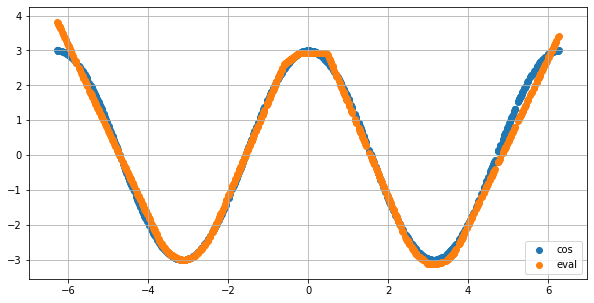

In [212]:
model.eval()

data = 2 * np.pi * 2 * (np.random.rand(1000, 1).astype(np.float32) - 0.5)
label = 3 * np.cos(data)

fig = plt.figure(figsize=(10, 5))

plt.scatter(data, label, label='cos')
plt.scatter(data, model(paddle.to_tensor(data)).numpy(), label='eval')

plt.legend(loc='lower right')
plt.grid()
plt.show()

## Pytorch

In [213]:
import torch
from collections import OrderedDict

In [216]:
class Dataset(torch.utils.data.Dataset):
    '''
    '''
    def __init__(self, nums=10000):
        self.nums = nums
        self.data = 2 * np.pi * 2 * (np.random.rand(nums, 1).astype(np.float32) - 0.5)
        self.label = 3 * np.cos(self.data)
        print(self.data.shape, self.label.shape)
        
    def __len__(self, ):
        return self.nums

    def __getitem__(self, i):
        '''
        '''
        return self.data[i], self.label[i]


dataset = Dataset(nums=100000)    
dataloader = torch.utils.data.DataLoader(dataset=dataset, batch_size=10000, shuffle=True)

for _data, _label in dataset:
    print(_data.shape, _label.shape)
    break

for _data, _label in dataloader:
    print(_data.shape, _label.shape)
    break

(100000, 1) (100000, 1)
(1,) (1,)
torch.Size([10000, 1]) torch.Size([10000, 1])


In [226]:
model = torch.nn.Sequential(OrderedDict([('l1', torch.nn.Linear(1, 32)),
                             ('a1', torch.nn.ReLU()),
                             ('l2', torch.nn.Linear(32, 32)),
                             ('a1', torch.nn.ReLU()),
                             ('fc', torch.nn.Linear(32, 1))])
                           )

mse = torch.nn.MSELoss().cuda()

model = model.cuda()
mse = mse.cuda()

model(torch.rand(100, 1).cuda()).shape

torch.Size([100, 1])

In [227]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# optimizer = torch.optim.Adam([{'params': model.parameters(), 'lr': 0.01}], lr=0.1)
# scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer=optimizer, milestones=[5, 10, 15], gamma=0.1)

In [228]:
model.train()

for e in range(80):
    for _data, _label in dataloader:
        
        _out = model(_data.cuda())
        _loss = mse(_out, _label.cuda())
        
        _loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()
    
    # scheduler.step()

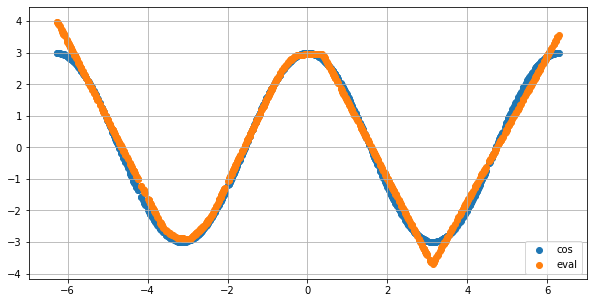

In [221]:
model.eval()

data = 2 * np.pi * 2 * (np.random.rand(1000, 1).astype(np.float32) - 0.5)
label = 3 * np.cos(data)

fig = plt.figure(figsize=(10, 5))

plt.scatter(data, label, label='cos')
plt.scatter(data, model(torch.tensor(data).cuda()).cpu().detach().numpy(), label='eval')

plt.legend(loc='lower right')
plt.grid()
plt.show()

# Others

In [235]:
x = np.array([[1.], [2.], [3.]])
A = np.random.rand(2, 3)
v = np.array([[1.], [1.]])

def forward(x, A):
    '''
    '''
    y = x ** 2
    z = np.dot(A, y)
    return z

def backward(v):
    '''
    '''
    dydx = 2 * x
    dzdy = A
    dzdx = dzdy * dydx.T
    
    dldx = np.dot(v.T, dzdx)

    return dldx
    
    
print(forward(x, A))
print(backward(v))

[[11.05761107]
 [ 9.40101972]]
[[2.11332298 5.57538129 9.21772534]]


In [236]:
def func(x):
    '''
    '''
    x = x ** 2
    AA = torch.from_numpy(A)
    
    return torch.mm(AA, x)

xx = torch.from_numpy(x)
func(xx)

tensor([[11.0576],
        [ 9.4010]], dtype=torch.float64)

In [237]:
grad = torch.autograd.functional.jacobian(func, xx).view(2, 3)
torch.mm(torch.tensor([[1.], [1.]], dtype=torch.float64).T, grad)

tensor([[2.1133, 5.5754, 9.2177]], dtype=torch.float64)